Este código se realiza para el Proyecto del Modulo 2 (Procesamiento de datos con Python) del Diplomado de Ciencias de Datos 2024.
Autor: Cinthya Simoneen
Fecha: Julio-2024
Temática de la Aplicación:

In [92]:
# Importando librerías que se van a usar en todo el proyecto
import requests
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import torch
#import torch.nn as nn
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Carga, Revisión y Limpieza de Datos

In [93]:
#Importamos el dfset global del archivo CSV que se generó de la consulta a la API
df_csv=pd.read_csv(filepath_or_buffer="tmp/heart.csv")
df=pd.DataFrame(df_csv)
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age: Edad del paciente en años.
sex: Genero del paciente (1 = hombre; 0 = mujer).
chest_pain_type: Tipo de dolor de pecho (intensidad)  0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
resting_blood_pressure: Presión arterial en descanso (mm Hg).
cholesterol: Colesterol en suero (mg/dl).
fasting_blood_sugar: Glucosa en sangre > 120 mg/dl (1 = true; 0 = false).
resting_electrocardiogram: Resultados del electrocardiograma (valores del 0 al 2).
max_heart_rate_achieved: Máxima frecuencia cardiaca durante el ejercicio.
exercise_induced_angina: Angina inducida por ejercicio (1 = si; 0 = no).
st_depression: Segmento ST deprimido al hacer ejercicio.
st_slope: Slope of the peak exercise ST segment (values from 1 to 3).
num_major_vessels: Vasos mayores inducidos por fluoroscopia (0-3)
thalassemia: Thalassemia (1 = normal; 2 = tratado; 3 = reversible).
target: Diagnóstico de enfermedad cardiaca (1 = presente; 0 = ausente).

In [95]:
number_columns = df.select_dtypes(include=['number']).columns
print("Numerical Column Names:", number_columns.tolist())

Numerical Column Names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [96]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object Column Names:", object_columns.tolist())

Object Column Names: []


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [99]:
# Si hay nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Análisis gráfica de los datos

Text(0, 0.5, '')

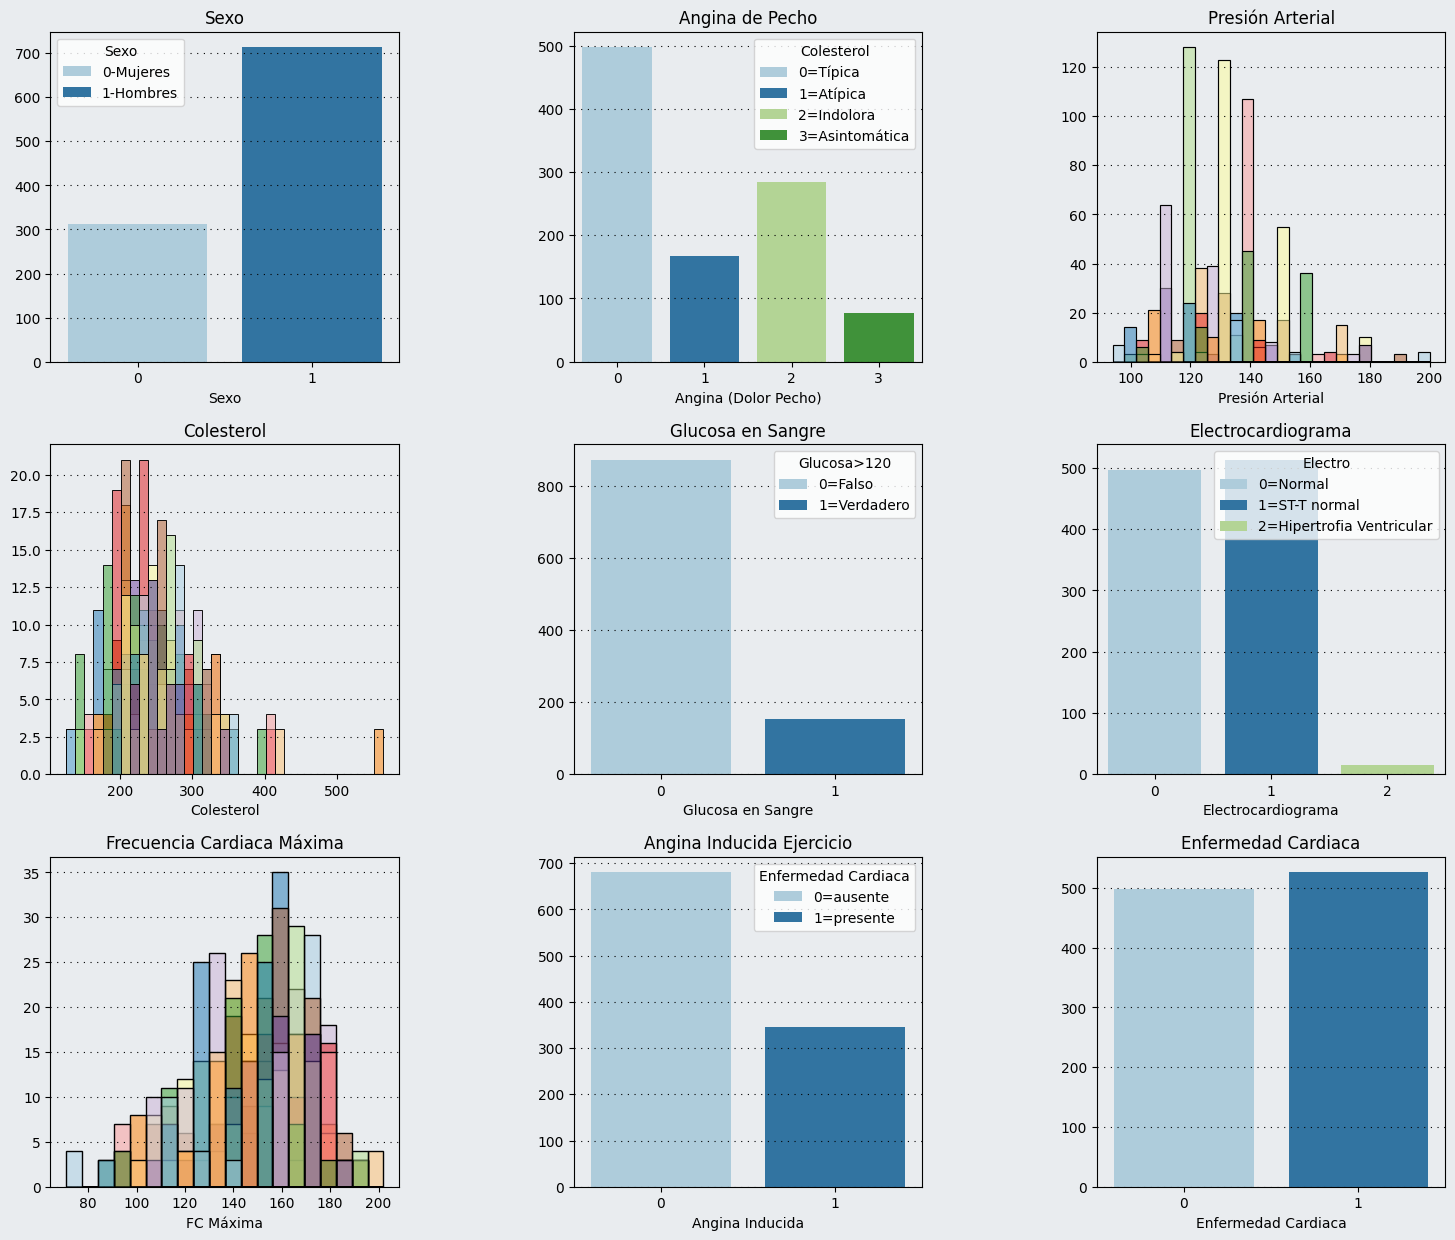

In [100]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#e9ecef"
color_palette ="Paired"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# sex 
ax0.set_title("Sexo")
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax0,data=df,x='sex',hue='sex', legend=True,palette=color_palette)
ax0.legend(title='Sexo', labels=['0-Mujeres', '1-Hombres'])
ax0.set_xlabel("Sexo")
ax0.set_ylabel("")

# cp
ax1.set_title("Angina de Pecho")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='cp', hue='cp', legend=True, palette=color_palette)
ax1.legend(title='Colesterol', labels= ['0=Típica','1=Atípica','2=Indolora','3=Asintomática'])
ax1.set_xlabel("Angina (Dolor Pecho)")
ax1.set_ylabel("")

# trestbps 
ax2.set_title("Presión Arterial")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax2,data=df,x='trestbps', hue="trestbps",legend=False , palette=color_palette)
ax2.set_xlabel("Presión Arterial")
ax2.set_ylabel("")

# chol colesterol
ax3.set_title("Colesterol")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax3,data=df,x='chol', hue="chol",legend=False, palette=color_palette)
ax3.set_xlabel("Colesterol")
ax3.set_ylabel("")

# fbs fastin blood sugar
ax4.set_title("Glucosa en Sangre")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='fbs', hue="fbs",legend=False, palette=color_palette)
ax4.legend(title='Glucosa>120', labels= ['0=Falso','1=Verdadero'])
ax4.set_xlabel("Glucosa en Sangre")
ax4.set_ylabel("")

# restecg - Resting electrocardiographic results
ax5.set_title("Electrocardiograma")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='restecg', hue="restecg",legend=False, palette=color_palette)
ax5.legend(title='Electro', labels= ['0=Normal','1=ST-T normal','2=Hipertrofia Ventricular'])
ax5.set_xlabel("Electrocardiograma")
ax5.set_ylabel("")

# thalach - Maximum heart rate achieved
ax6.set_title("Frecuencia Cardiaca Máxima")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax6,data=df,x='thalach', hue="thalach",legend=False, palette=color_palette)
ax6.set_xlabel("FC Máxima")
ax6.set_ylabel("")

# exang Exercise induced angina ~ 1 = Yes, 0 = No
ax7.set_title("Angina Inducida Ejercicio")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='exang', hue="exang",legend=False, palette=color_palette)
ax7.legend(title='Angina Inducida', labels= ['0=No','1=Si'])
ax7.set_xlabel("Angina Inducida")
ax7.set_ylabel("")

# Target 
ax8.set_title("Enfermedad Cardiaca")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='target', hue="target",legend=False, palette=color_palette)
ax7.legend(title='Enfermedad Cardiaca', labels= ['0=ausente','1=presente'])
ax8.set_xlabel("Enfermedad Cardiaca")
ax8.set_ylabel("")

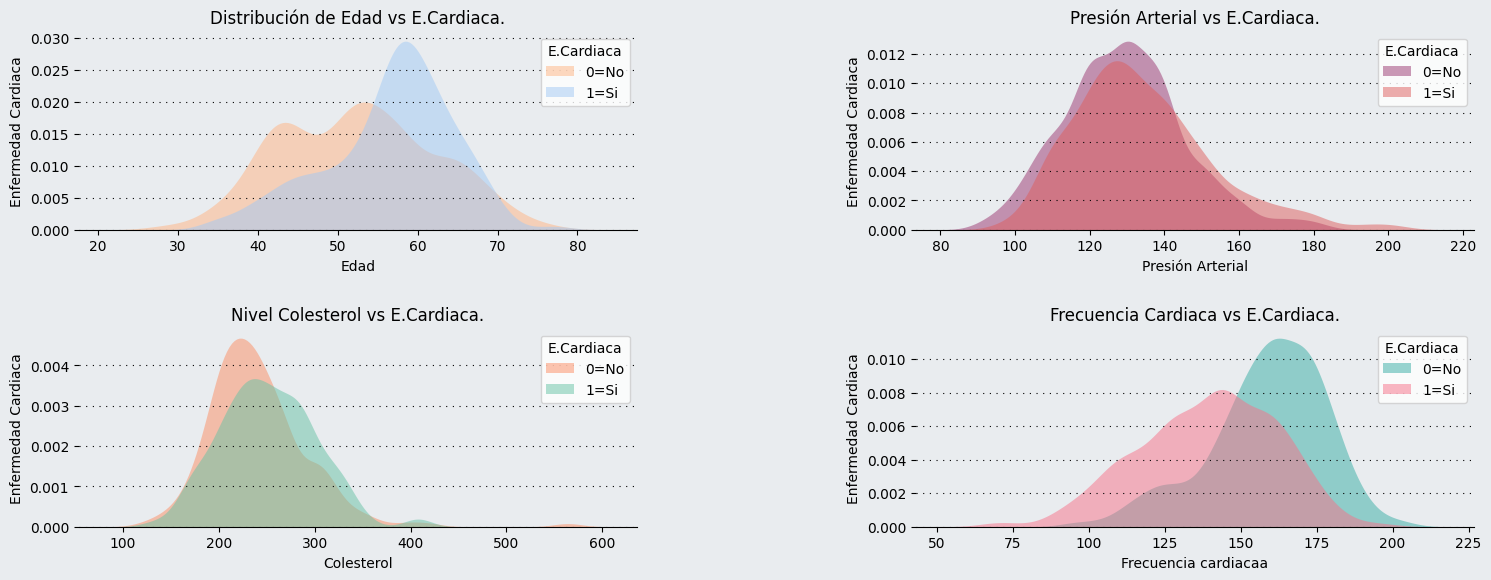

In [101]:
# Distribución de Enfermedad cardiaca de acuerdo al indicador
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

background_color = "#e9ecef"
color_palette = "Paired"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)

# Age
ax0.set_title("Distribución de Edad vs E.Cardiaca.")
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax0, data=df, x='age',hue="target", fill=True,palette="pastel", alpha=.5, linewidth=0)
ax0.legend(title='E.Cardiaca', labels= ['0=No','1=Si'])
ax0.set_xlabel("Edad")
ax0.set_ylabel("Enfermedad Cardiaca")

# TrTbps
ax1.set_title("Presión Arterial vs E.Cardiaca.")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='trestbps',hue="target", fill=True,palette="flare", alpha=.5, linewidth=0)
ax1.legend(title='E.Cardiaca', labels= ['0=No','1=Si'])
ax1.set_xlabel("Presión Arterial")
ax1.set_ylabel("Enfermedad Cardiaca")

# Chol
ax2.set_title("Nivel Colesterol vs E.Cardiaca.")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax2, data=df, x='chol',hue="target",fill=True,palette="Set2", alpha=.5, linewidth=0)
ax2.legend(title='E.Cardiaca', labels= ['0=No','1=Si'])
ax2.set_xlabel("Colesterol")
ax2.set_ylabel("Enfermedad Cardiaca")

# Thalachh title
ax3.set_title("Frecuencia Cardiaca vs E.Cardiaca.")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='thalach',hue="target", fill=True,palette="husl", alpha=.5, linewidth=0)
ax3.legend(title='E.Cardiaca', labels= ['0=No','1=Si'])
ax3.set_xlabel("Frecuencia cardiacaa")
ax3.set_ylabel("Enfermedad Cardiaca")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

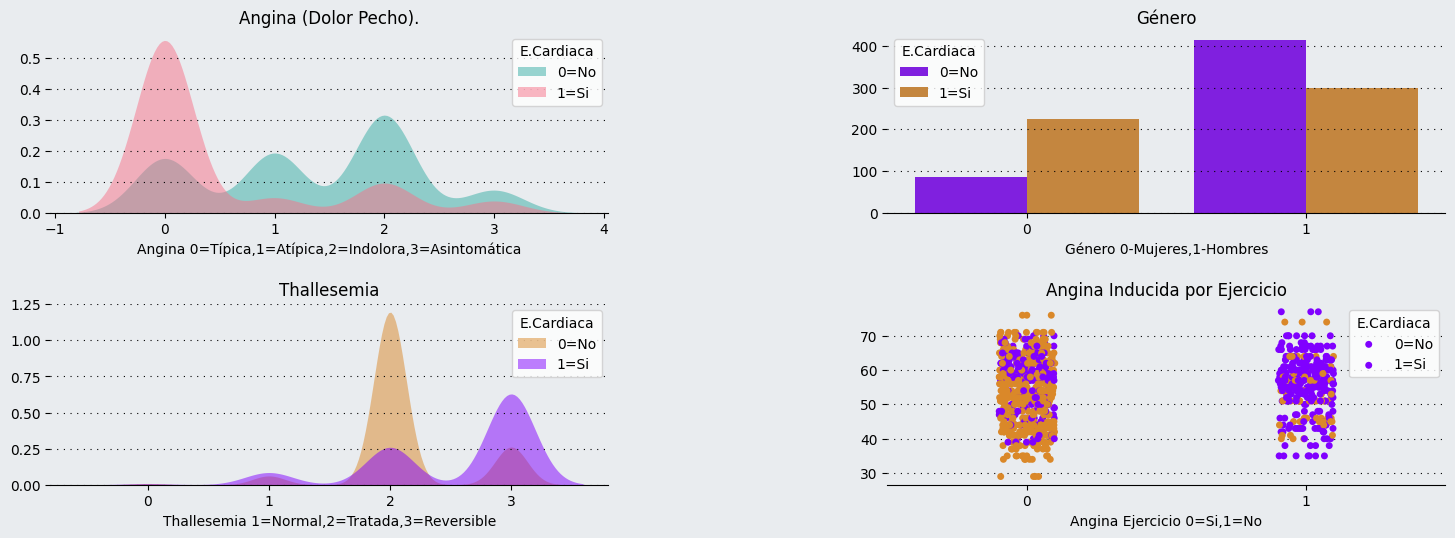

In [102]:
# Distribución de Enfermedad cardiaca de acuerdo al indicador
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

background_color = "#e9ecef"
color_palette = "husl"

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)

# Cp chest pain
ax0.set_title("Angina (Dolor Pecho).")
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax0, data=df, x='cp',hue="target", legend=True, fill=True, palette=color_palette, alpha=.5, linewidth=0)
ax0.legend(title='E.Cardiaca', labels= ['0=No','1=Si'])
ax0.set_xlabel("Angina 0=Típica,1=Atípica,2=Indolora,3=Asintomática")
ax0.set_ylabel("")

# Sex
ax1.set_title("Género")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',legend=True, palette=["#8000ff","#da8829"], hue='target')
ax1.legend(title='E.Cardiaca', labels= ['0=No','1=Si'])
ax1.set_xlabel("Género 0-Mujeres,1-Hombres")
ax1.set_ylabel("")

# Thall title
ax2.set_title("Thallesemia")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax2, data=df, x='thal',hue="target", fill=True,legend=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax2.legend(title='E.Cardiaca', labels= ['0=No','1=Si'])
ax2.set_xlabel("Thallesemia 1=Normal,2=Tratada,3=Reversible")
ax2.set_ylabel("")

# Exng
ax3.set_title("Angina Inducida por Ejercicio")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax3, data=df,x='exang',y='age',hue='target',legend=True, palette=["#8000ff","#da8829"])
ax3.legend(title='E.Cardiaca', labels= ['0=No','1=Si'])
ax3.set_xlabel("Angina Ejercicio 0=Si,1=No")
ax3.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)



In [103]:
cor_mat= df.corr()
cor_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


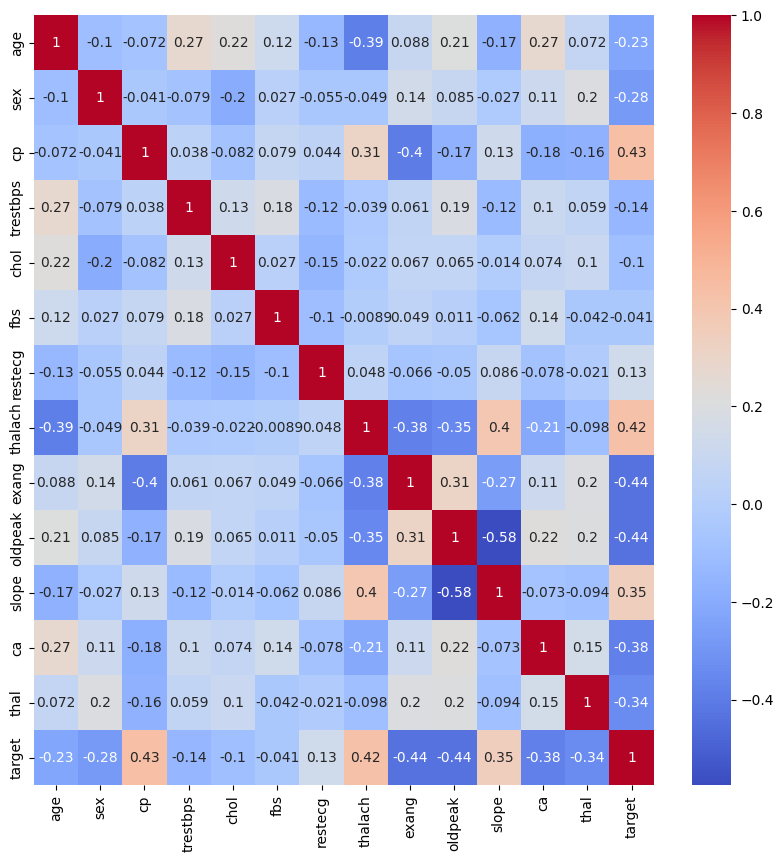

In [104]:
# Mapa de calor usando la correlación de los datos
top_corr_features = cor_mat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="coolwarm")

# Preparación de los datos

In [105]:
# Escalamos los datos y dividimos en columnas numericas y categóricas
df_escalar = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_a_escalar = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_escalar[columns_a_escalar] = standardScaler.fit_transform(df_escalar[columns_a_escalar])

df_escalar.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [106]:
# Elegir las  variables a usar para todos los algoritmos usados de aquí en adelante
X = df.drop(['target'], axis = 1)
y = df['target']

# KMEANS 

In [107]:
#Usando Kmeans
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [108]:
# Utilizamos 4 
knn_classifier = KNeighborsClassifier(n_neighbors = 4) # o 9
score=cross_val_score(knn_classifier,X,y,cv=10)

In [109]:
#Sacamos en score del modelo
score.mean()

np.float64(0.8349990481629546)

In [110]:
# Para segmentar usamos age y sex
df_kmeans = df[['age','thalach']]
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_kmeans)

KMeans(n_clusters=4, random_state=42)

In [111]:
centroides = kmeans.cluster_centers_
centroides

array([[ 58.1010101 , 113.26262626],
       [ 55.28011204, 161.46778711],
       [ 57.32323232, 141.03367003],
       [ 43.53179191, 178.52601156]])

In [112]:
etiquetas = kmeans.labels_
etiquetas

score.mean()

np.float64(0.8349990481629546)

Text(0, 0.5, 'Frecuencia Cardiaca en Reposo')

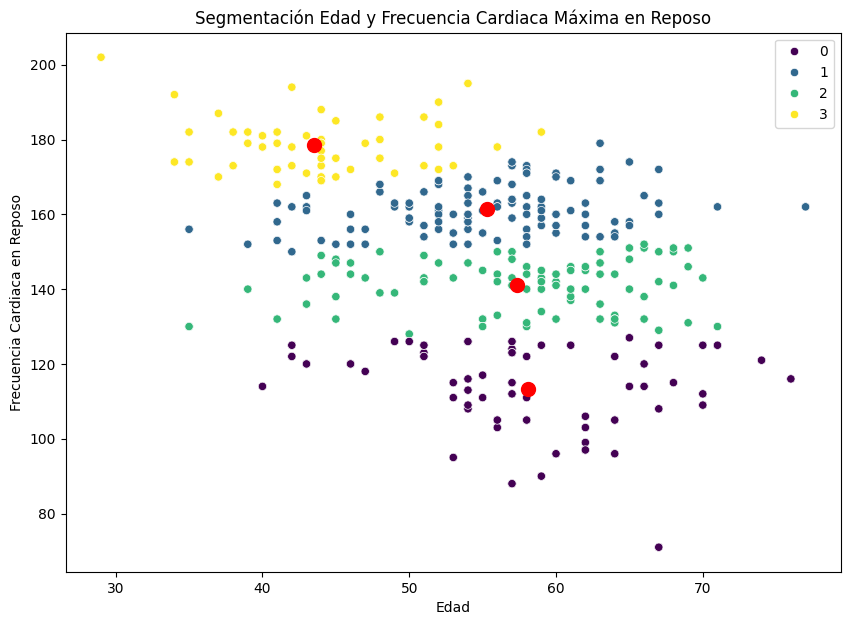

In [113]:
#Generar Gráfica
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_kmeans, x='age', y='thalach', hue=etiquetas,legend=True, palette='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100, marker='o', label='Centroides')
plt.title('Segmentación Edad y Frecuencia Cardiaca Máxima en Reposo')
plt.xlabel("Edad")
plt.ylabel("Frecuencia Cardiaca en Reposo")


# Árbol de Desición

In [114]:
# Elegir las  variables 
X = df.drop("target", axis=1)
y = df["target"]

In [115]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X,y,train_size=0.8,random_state=42)
arbol = DecisionTreeClassifier()
arbol.fit(X_entrena, y_entrena)

score.mean()

np.float64(0.8349990481629546)

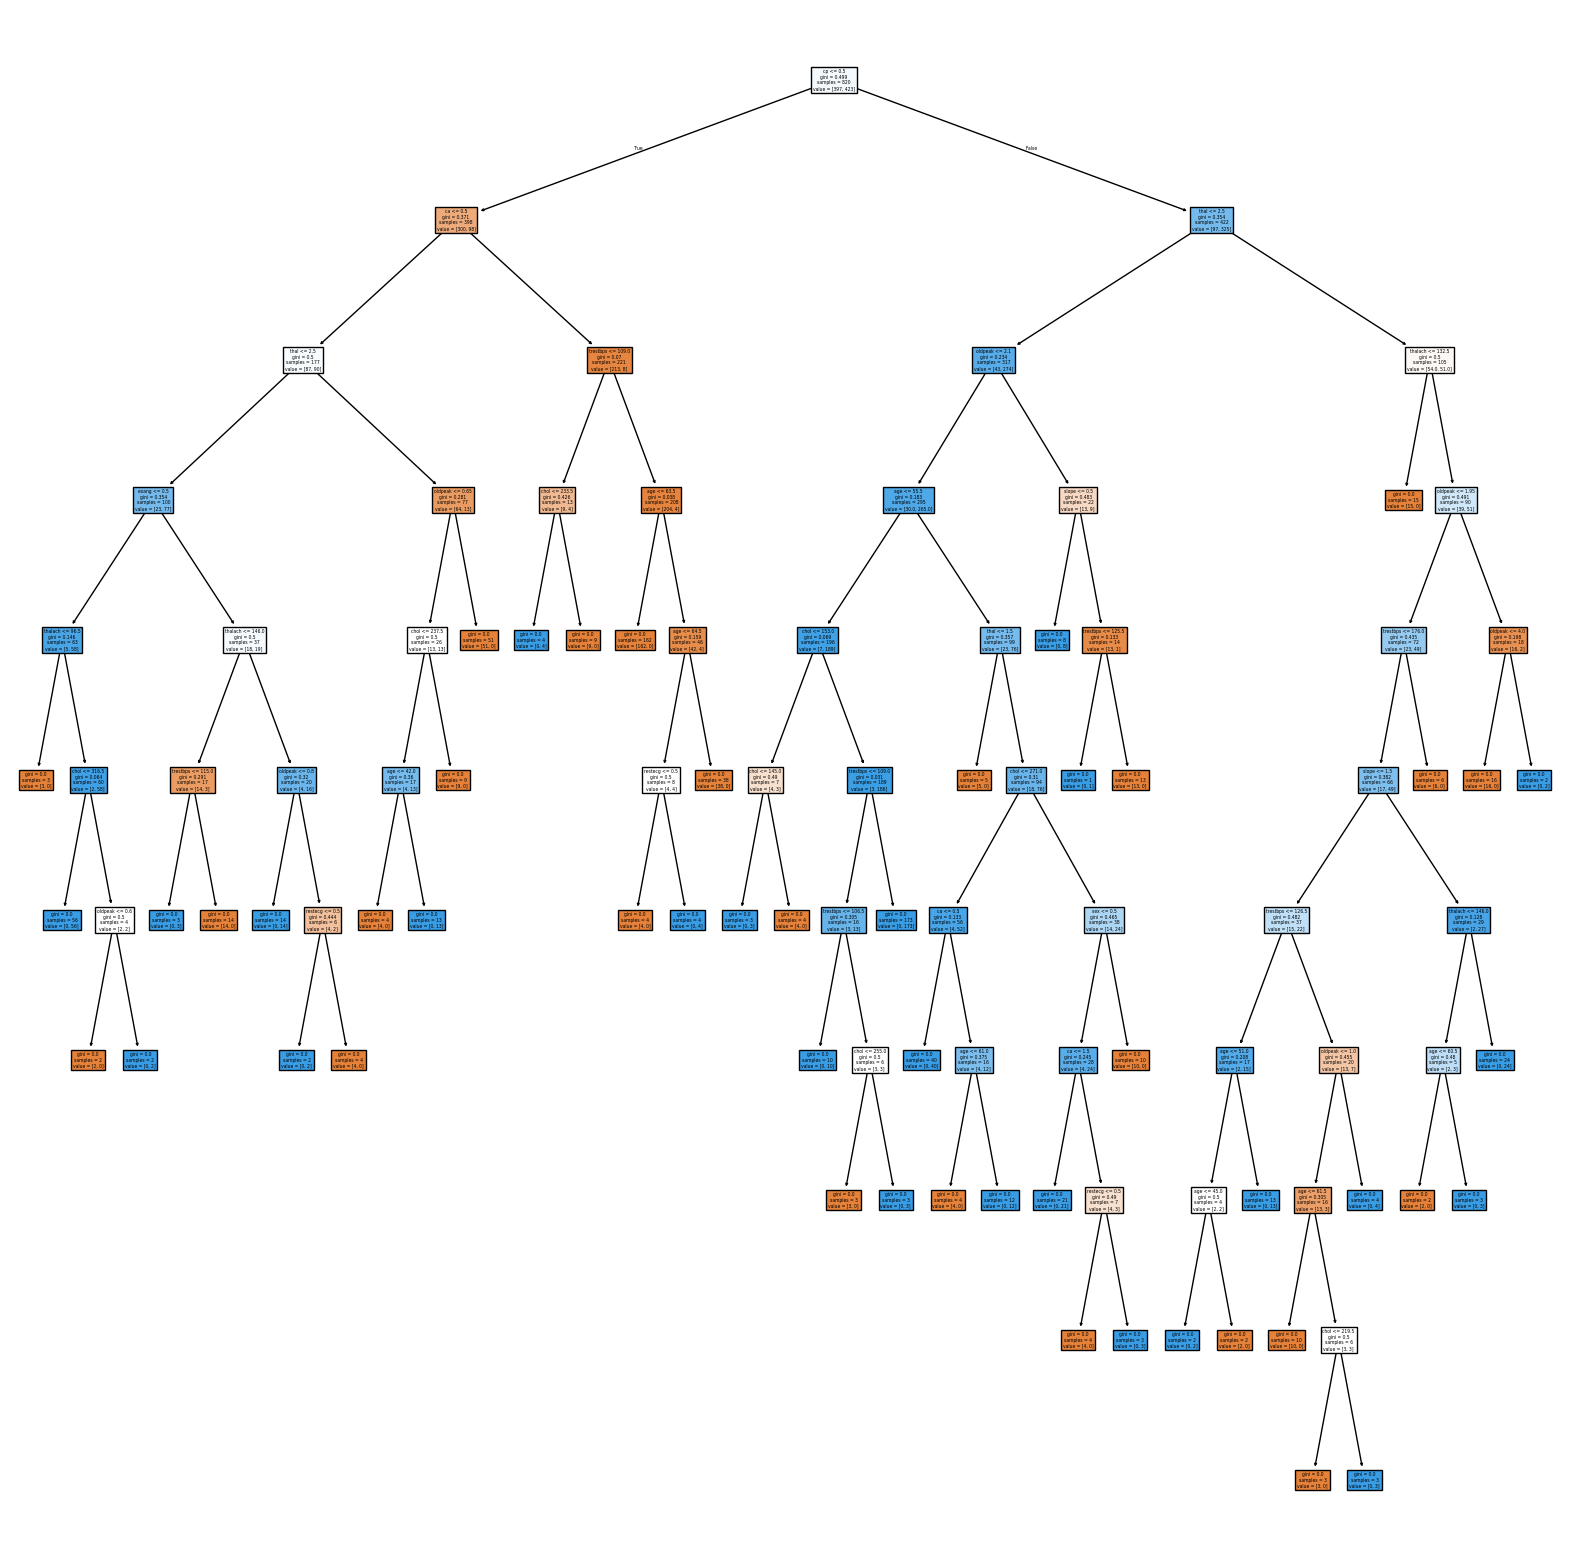

In [116]:
plt.figure(figsize=(20, 20))
plot_tree(decision_tree=arbol,
          feature_names = df.columns.to_list(),
          filled=True);

In [117]:
df.sample(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
155,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1


In [118]:
#prediccion usando el árbol
## Prediction
X = np.array(['234','49','0,0','130','269','0','1','163','0','0','2','0','2'])
label = LabelEncoder()
X = label.fit_transform(X)
y_pred = arbol.predict(X.reshape(1,-1))
y_pred

c:\BEDU_CIENCIA_DATOS\Modulo4\Repaso\Ejercicios\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# Regresión Logistica

In [119]:
X = df.drop(columns='target', axis=1)
y = df['target']

X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [120]:
X_entrena

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
688,56,0,0,200,288,1,0,133,1,4.0,0,2,3
477,57,1,2,128,229,0,0,150,0,0.4,1,1,3
336,57,1,2,150,126,1,1,173,0,0.2,2,1,3
960,52,0,2,136,196,0,0,169,0,0.1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,57,1,0,130,131,0,1,115,1,1.2,1,1,3
367,48,1,1,110,229,0,1,168,0,1.0,0,0,3
393,62,0,0,160,164,0,0,145,0,6.2,0,3,3
777,53,1,0,123,282,0,1,95,1,2.0,1,2,3


In [121]:
modelo = LogisticRegression()

In [122]:
modelo.fit(X_entrena, y_entrena)

c:\BEDU_CIENCIA_DATOS\Modulo4\Repaso\Ejercicios\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
modelo.score(X_entrena, y_entrena)

0.8512195121951219

In [124]:
df_prediccion=df.sample(50)
df_pred=df_prediccion.drop(columns='target', axis=1)
#df_prediccion["target_pred"] = 0
df_pred

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
330,37,0,2,120,215,0,1,170,0,0.0,2,0,2
489,61,1,2,150,243,1,1,137,1,1.0,1,0,2
619,65,1,0,110,248,0,0,158,0,0.6,2,2,1
992,50,0,0,110,254,0,0,159,0,0.0,2,0,2
862,59,1,3,170,288,0,0,159,0,0.2,1,0,3
630,45,1,3,110,264,0,1,132,0,1.2,1,0,3
169,45,0,1,112,160,0,1,138,0,0.0,1,0,2
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2
466,44,1,1,130,219,0,0,188,0,0.0,2,0,2
459,51,1,0,140,261,0,0,186,1,0.0,2,0,2


In [125]:
#Correr la prueba usando el modelo

# age, sex, cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
list_tests=df_pred.to_numpy().tolist()
list_values=[]
list_count=[]
contador=0
for i in list_tests:
  data_prediccion =tuple(i)      #(61,0,0,145,307,0,0,146,1,1,1,0,3)
  data_prediccion_array= np.asarray(data_prediccion)
  data_reshaped = data_prediccion_array.reshape(1,-1)
  data_reshaped
  list_values.append(int(modelo.predict(data_reshaped)))
  contador += 1
  list_count.append(contador) 
df_prediccion["target_pred"] = list_values
df_prediccion["count"] = list_count
df_prediccion


c:\BEDU_CIENCIA_DATOS\Modulo4\Repaso\Ejercicios\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\CinthyaS\AppData\Local\Temp\ipykernel_11632\3869315668.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  list_values.append(int(modelo.predict(data_reshaped)))
c:\BEDU_CIENCIA_DATOS\Modulo4\Repaso\Ejercicios\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\CinthyaS\AppData\Local\Temp\ipykernel_11632\3869315668.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from you

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_pred,count
330,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1,1,1
489,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1,0,2
619,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0,1,3
992,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,1,4
862,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,1,5
630,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1,6
169,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1,1,7
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,0,8
466,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1,1,9
459,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1,1,10


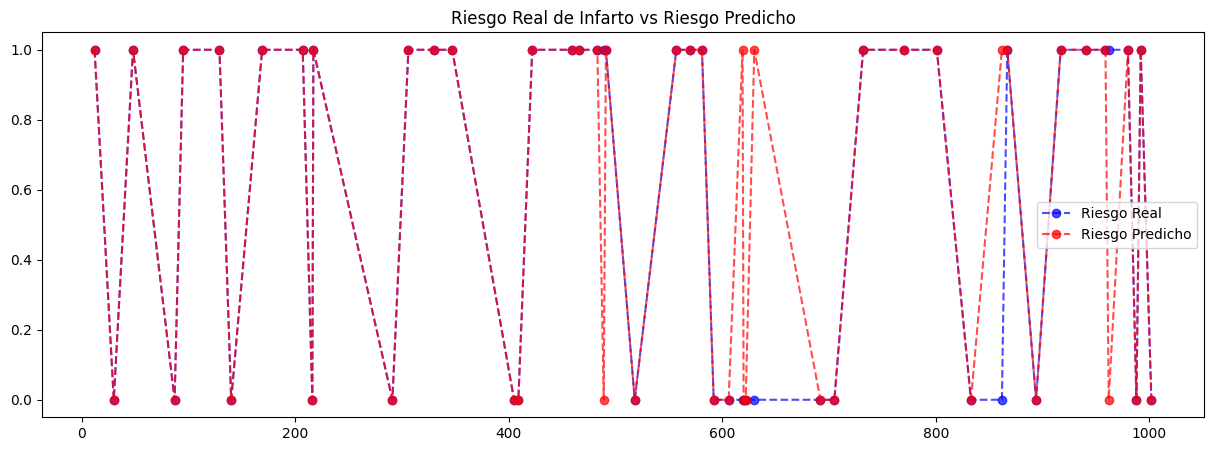

In [126]:
#Graficar valor real vs predicción
df_prediccion = df_prediccion.sort_index()
plt.figure(figsize=(15, 5))
plt.plot(df_prediccion['target'],label='Riesgo Real', alpha=0.7,marker='o', linestyle='dashed', color ='blue')
plt.plot(df_prediccion['target_pred'], label='Riesgo Predicho', alpha=0.7,marker='o', linestyle='dashed', color='red')
plt.legend()
plt.title('Riesgo Real de Infarto vs Riesgo Predicho');

In [127]:
#Cambiando Valores y volviendo a predecir riesgo 
# age, sex, cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
#chol

#Correr la prueba usando el modelo

# age, sex, cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
list_values=[]
list_count=[]

df_mejoria=df_pred

df_pred['chol']=((df_pred['chol'])-((df_pred['chol'])* 0.10))
list_tests=df_pred.to_numpy().tolist()


contador=0
for i in list_tests:
  data_prediccion =tuple(i)      
  data_prediccion_array= np.asarray(data_prediccion)
  data_reshaped = data_prediccion_array.reshape(1,-1)
  data_reshaped
  list_values.append(int(modelo.predict(data_reshaped))) 
  contador += 1
  list_count.append(contador) 
  
df_prediccion["target_pred"] = list_values
df_prediccion["count"] = list_count
df_prediccion["chol_antes"]=(df_pred['chol']+(df_pred['chol']* 0.10))
df_prediccion["chol_despues"]=df_pred['chol']
df_prediccion












c:\BEDU_CIENCIA_DATOS\Modulo4\Repaso\Ejercicios\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\CinthyaS\AppData\Local\Temp\ipykernel_11632\2196079602.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  list_values.append(int(modelo.predict(data_reshaped)))
c:\BEDU_CIENCIA_DATOS\Modulo4\Repaso\Ejercicios\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\CinthyaS\AppData\Local\Temp\ipykernel_11632\2196079602.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from you

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_pred,count,chol_antes,chol_despues
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,1,1,207.90,189.0
30,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0,0,2,167.31,152.1
48,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,1,3,275.22,250.2
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,1,4,246.51,224.1
95,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1,1,5,233.64,212.4
129,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,1,6,190.08,172.8
140,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0,1,7,271.26,246.6
169,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1,1,8,158.40,144.0
207,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1,1,9,247.50,225.0
216,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0,1,10,251.46,228.6


In [128]:
df_prediccion=df.sample(10)
df_prediccion

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
735,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1
584,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
769,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
176,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
952,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
497,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
955,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
399,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
213,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
361,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
